# Objetivos deste trabalho:
- Se familiarizar com o ambiente Notebook e com Python
- Implementar um perceptron simples, treiná-lo no conjunto de TREINO do CIFAR-10 e avaliá-lo no conjunto de TESTE (alvo: distinguir fotos de animais de meios de transporte)
- Utilizar a função sigmóide e verificar seu efeito no treinamento e na avaliação
- Modificar a metodologia para classificar cada classe individualmente (i.e. treinar 10 perceptrons, um para cada classe). Considerar: dado um exemplo, que passará por cada perceptron, como decidir qual é a classe dele?

In [1]:
%matplotlib inline

import torch
import torchvision
import numpy as np

np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [5]:
# Converter para tons de cinza

# Treino
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append((gray_npimg,category))
    
# Teste
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append((gray_npimg,category))    

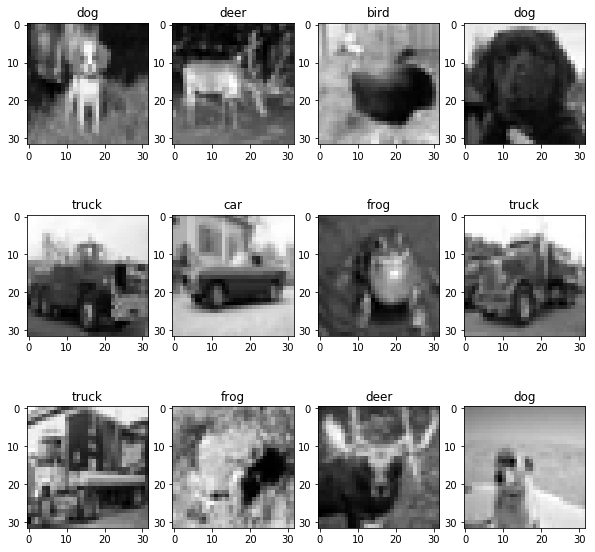

In [6]:
# Mostrar imagens

import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    image_index = random.randint(0, len(dataset_train))
    label = grayscale_dataset_train[image_index][1]
    npimg = grayscale_dataset_train[image_index][0]

    fig.add_subplot(rows, columns, i)
    
    plt.imshow(npimg, cmap='gray')
    plt.title(label)
    
plt.show()

In [7]:
# Converter para vetores 1D

# Para pensar: por que a divisão por 255 no código abaixo?

linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))    

In [8]:
size = len(linear_dataset_train[0][0])
print(size)

1024


# Definindo o perceptron

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def perceptron(inputs, weights):
    # Defina o perceptron aqui
    # print(inputs, weights[:len(weights)-1], weights[len(weights)-1])
    # o = np.dot(inputs, weights[:len(weights)-1]) + weights[len(weights)-1]
    #inputs = np.append(inputs, 1)
    o = np.dot(inputs, weights)
    return o


# Treinando o perceptron

In [10]:
def evaluate(weights,dataset):
    hits = 0
    for img,label in dataset:
        img = np.append(img, 1)
        # Defina a métrica de avaliação do perceptron aqui (e.g. acurácia)
        o = perceptron(img, weights)
        y = sigmoid(o)
        if(y >= 0.5 and label == 1):
            hits += 1
        
        elif(y < 0.5 and label == 0):
            hits += 1
            
    accuracy = hits / len(dataset)
    return accuracy
        

In [19]:
# Inicialização
weights = (np.random.rand(1,size) - 0.5)[0]
bias = (np.random.rand(1) - 0.5) 
weights = np.append(weights, bias) 

neta = 0.001  # default = 0.001
np.random.shuffle(linear_dataset_train)
epochs = 100

# Implemente o treino aqui (para separar as duas classes definidas)
accuracies = []
losses = []
hits = 0
loss = 0

for epoch in range(epochs):
    for image, label in linear_dataset_train:
        image = np.append(image, 1)
        
        o = perceptron(image, weights)
        y = sigmoid(o)
        
        if(y >= 0.5 and label == 1):
            hits += 1
        
        elif(y < 0.5 and label == 0):
            hits += 1

        delta_weights = neta * (label - y) * image * y * (1 - y)
        weights += delta_weights
        loss += abs(label - y)
        
    accuracy = hits / len(linear_dataset_train)
    accuracies = np.append(accuracies, accuracy)
    losses = np.append(losses, loss)
    hits = 0
    
    
    print(epoch, accuracy, loss)
    loss = 0
    

0 0.65486 19665.031538717754
1 0.69336 18065.566876973684
2 0.70118 17917.019085724773
3 0.70418 17916.420812499084
4 0.70624 17960.215878960225
5 0.70858 18007.206992544965
6 0.71064 18043.203229585397
7 0.71174 18066.582157462384
8 0.71374 18079.84771204861
9 0.71552 18085.906621771956
10 0.71652 18087.006927650356
11 0.7184 18084.698728622814
12 0.71918 18080.03041962757
13 0.72028 18073.727008357386
14 0.72128 18066.3078107414
15 0.72202 18058.15685310873
16 0.72302 18049.56441140669
17 0.72352 18040.752390682665
18 0.72408 18031.890823713748
19 0.72498 18023.109360912174
20 0.72532 18014.505761355507
21 0.72544 18006.152439151763
22 0.72564 17998.10164304075
23 0.72618 17990.389611059905
24 0.7258 17983.039922745695
25 0.72594 17976.066207582775
26 0.72622 17969.47433111235
27 0.72662 17963.26415556974
28 0.72704 17957.430953985928
29 0.72746 17951.966542573115
30 0.7277 17946.860184647743
31 0.7278 17942.0993097429
32 0.7279 17937.67008354502
33 0.72784 17933.557857670836
34 0.72

In [16]:
# Avalie o modelo treinado aqui
# Como a acurácia no conjunto de teste se compara com a acurácia obtida no conjunto de treino?

# A acurácia no conjunto de treino é maior devido ao overfitting do conjunto de treinamento.
# Analogamente, a acurácia do conjunto de teste é menor justamente pelo fato de que as imagens do 
# conjunto de teste nunca foram apresentadas ao modelo.

train = evaluate(weights, linear_dataset_train)
test = evaluate(weights, linear_dataset_test)

print(train, test)


0.73662 0.7261


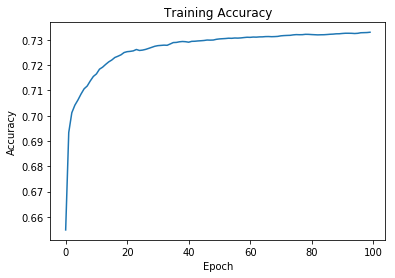

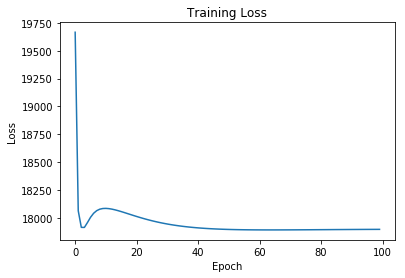

In [20]:
# Caso queiram plotar alguma coisa

import matplotlib.pyplot as plt


plt.plot(accuracies)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.show()

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()


# Classificando classes individuais

Implemente aqui a modificação do processo de avaliação e treinamento para poder classificar cada classe individualmente.

- Ideia geral: treinar um perceptron por classe (exemplo positivo = exemplos da classe; exemplos negativos = exemplo de todas outras classes)
- Dado um exemplo qualquer, como decidir qual perceptron está dando a classe correta?